In [2]:
import geopandas
from geopandas import GeoSeries
import pandas as pd

gpd_skolky = geopandas.read_file('../assets/skolky.geojson')
addresses = pd.read_csv('../assets/adresní_místa___Address_points.csv')
# addresses_geo = geopandas.read_file('../assets/adresní_místa___Address_points.csv')

In [3]:
gpd_skolky.head()

,ObjectId,objectid_12,kod_ruian,cislo_domo,cislo_orie,cislo_or_1,mc,ulice_naze,kod,adresa,datum_exportu,GlobalID,geometry
0,1,1,25753193,743,4,,BRNO-BOHUNICE,Amerlingova,2186,Amerlingova 4,2022-04-02T00:00:00+00:00,{0F9F797F-18F3-4553-BAFD-9D00F5ECBF36},POINT (16.57844 49.16783)
1,2,2,19216505,570,4,,BRNO-BOHUNICE,Běloruská,2172,Běloruská 4,2022-04-02T00:00:00+00:00,{505B9F70-C39E-4025-A323-B0121C5C60BF},POINT (16.58039 49.16869)
2,3,3,25753207,744,11,,BRNO-BOHUNICE,Švermova,2072,Švermova 11,2022-04-02T00:00:00+00:00,{AB2492B9-8486-4B95-8BC4-38A8E34F24D2},POINT (16.57081 49.16770)
3,4,4,19216491,569,30,,BRNO-BOHUNICE,Uzbecká,2180,Uzbecká 30,2022-04-02T00:00:00+00:00,{6B84547B-B208-43D9-BEB1-73FC85697B50},POINT (16.58172 49.17183)
4,5,5,19217307,655,10,,BRNO-BOHUNICE,Vedlejší,2222,Vedlejší 10,2022-04-02T00:00:00+00:00,{CFD932C7-2F27-487C-9E03-48A233F5CD88},POINT (16.57156 49.17106)


In [4]:
kinder_buffered = GeoSeries.to_crs(gpd_skolky['geometry'], crs=4326).buffer(0.005)

/tmp/ipykernel_5210/2734867679.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kinder_buffered = GeoSeries.to_crs(gpd_skolky['geometry'], crs=4326).buffer(0.005)


In [5]:
from shapely.geometry import Point

addresses['point'] = addresses.apply(lambda address: Point(address.X, address.Y), axis=1)

/home/pavolp/hackaton/pybakers_street_ranking/venv/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [6]:
points= geopandas.GeoSeries(addresses['point'], crs=4326)

<AxesSubplot:>

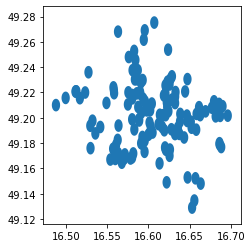

In [7]:
kinder_buffered.plot()

In [8]:
addresses.head()

,X,Y,ObjectId,obec_nazev,cislo_domovni,cislo_orientacni_hodnota,cislo_orientacni_pismeno,ulice_nazev,cobce_nazev,psc,stavobj_kod,puvod,datum_exportu,GlobalID,point
0,16.619237,49.197930,1,Brno,503.0,36.0,NaN,Cejl,Zábrdovice,60200.0,19023804,geometrie z DMB,2022/04/09 00:00:00+00,{0E8664CE-B764-4CE1-B2EF-47D19A00F184},POINT (16.6192365260001 49.197930086)
1,16.634682,49.212012,2,Brno,168.0,51.0,NaN,Dukelská třída,Husovice,61400.0,19074514,geometrie z DMB,2022/04/09 00:00:00+00,{623D79C4-808C-43FF-8A25-369759800C7A},POINT (16.6346821060001 49.2120119140001)
2,16.599852,49.200925,3,Brno,471.0,29.0,NaN,Veveří,Veveří,60200.0,19009470,geometrie z DMB,2022/04/09 00:00:00+00,{60D52A3C-C5C5-464A-A5A5-A030D61295E8},POINT (16.5998515210001 49.2009248000001)
3,16.618347,49.234069,4,Brno,557.0,18.0,NaN,Jurkovičova,Lesná,63800.0,19094621,geometrie z DMB,2022/04/09 00:00:00+00,{44E9CA08-0425-4224-BD98-105D7D24B428},POINT (16.618346554 49.2340689430001)
4,16.634752,49.194910,5,Brno,3280.0,24.0,NaN,Šámalova,Židenice,61500.0,19446969,geometrie z DMB,2022/04/09 00:00:00+00,{C8019433-F434-44E7-A071-8D0944542CBC},POINT (16.6347521340001 49.194909894)


In [9]:
results = kinder_buffered.apply(lambda school: points.within(school))

In [10]:
results

,0,1,2,3,4,5,6,7,8,9,...,62541,62542,62543,62544,62545,62546,62547,62548,62549,62550
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
t = results.transpose()

In [12]:
t

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
filtered_addresses=t.loc[(t == True).any(axis=1)]

In [14]:
# num_of_schools= filtered_addresses.apply(lambda address: address[address==True].index, axis=1)

In [19]:
num_of_schools_nearby = filtered_addresses.apply(lambda address: address[address==True].count(), axis=1)

In [37]:
num_of_schools_nearby.index.name = 'address_idx'
#num_of_schools_nearby.to_csv('skolky.csv')

In [46]:
num_of_schools_nearby.name = 'count_of_kindergardens'

In [51]:
num_of_schools_nearby

address_idx
0        2
1        1
2        1
4        2
5        1
        ..
62544    1
62545    1
62548    1
62549    2
62550    2
Name: count_of_kindergardens, Length: 37651, dtype: int64

In [53]:
num_of_schools_nearby.to_csv('skolky.csv', header=False)